# 분류모형
## 확률적 모형
조건부확률conditional probability

    - 확률적 생성generative 모형
        * Linear/Quadratic Discriminant Analysis
        * Naive Bayes
        
    - 확률적 판별discriminative 모형 
        * Logistic Regression
        * Decision Tree

## 판별함수 모형 
경계면decision boundary, 판별함수discriminant function
      
    - 종류
        * perceptron
        * Support Vector Machine
        * Neural Network
        

## 1. 확률적 모형
- x 주어졌을 때, 클래스k가 될 확률을 구하고
- 가장 확률이 큰 클래스k를 선택
$$ y = \arg\max_{k} P(y=k \mid x)$$

### 1.1 확률적 생성generative 모형
- target: posteterior $P(y=k \mid x)$
- need: likelyhodd $P(x \mid y=k)$ <- 각 class별 특징 데이터의 확률분포
- 계산량이 많음
- class가 많으면 필요 데이터 증가

$$
P(y=k \mid x) = \dfrac{P(x \mid y=k)P(y=k)}{P(x)}
$$

- eg. QDA, Naive Bayesian

### 1.1.1. QDA(Quadratic Discriminant Analysis)
- class
    - y=0:검, y=1: 흰

In [32]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([0,0,0,1,1,1])

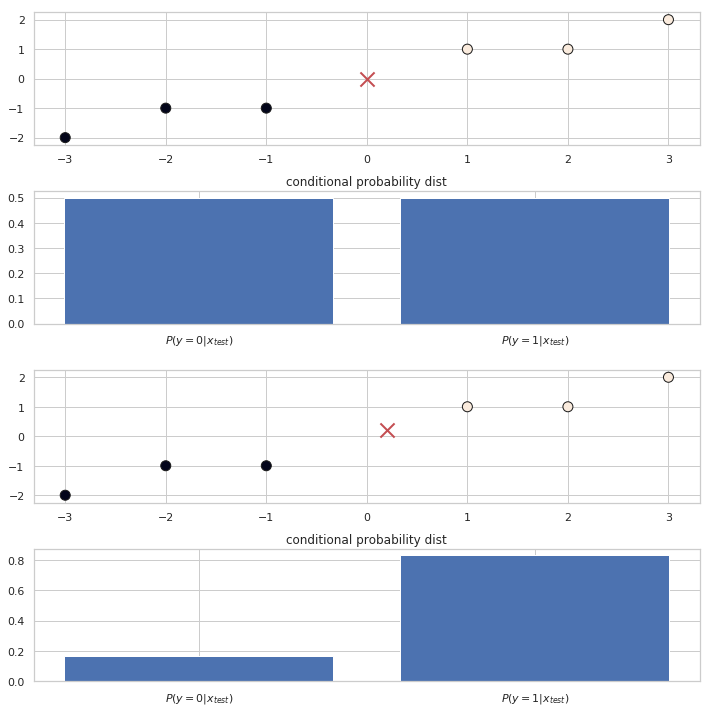

In [39]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# model
model = QuadraticDiscriminantAnalysis().fit(X, y)

plt.figure(figsize=(10,10))

# train
plt.subplot(411)
plt.scatter(X.T[0], X.T[1], c=y, s=100, edgecolors='k')
plt.subplot(413)
plt.scatter(X.T[0], X.T[1], c=y, s=100, edgecolors='k')

# test1
x1 = [[0, 0]]
p1 = model.predict_proba(x1)[0]
x2 = [[0.2, 0.2]]
p2 = model.predict_proba(x2)[0]

plt.subplot(411)
plt.scatter(x1[0][0], x1[0][1], c='r', edgecolors='k', marker='x', s=200, linewidth=2)
plt.subplot(413)
plt.scatter(x2[0][0], x2[0][1], c='r', edgecolors='k', marker='x', s=200, linewidth=2)

# probability
plt.subplot(412)
plt.bar(model.classes_, p1)
plt.title("conditional probability dist")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])

plt.subplot(414)
plt.bar(model.classes_, p2)
plt.title("conditional probability dist")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])

plt.tight_layout()
plt.show()

### 1.1.2 Naive Bayesian
- class 3개 이상
- eg. 특정 텍스트 데이터가 20개 cat에 속할 확률 각각 계산
- 코드 
    - `Pipeline`: 아래 두 클래스객체를 한 개 모형으로 겹침
    - `TfidfVectorizer`: 텍스트 데이터를 실수 벡터로 전환
    - `MultinomialNB`: 나이브 베이즈으로 분류 문제 예측

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

news = fetch_20newsgroups(subset='all')
model = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('nb', MultinomialNB()),
])
model.fit(news.data, news.target)

n = 1
x = news.data[n:n + 1]
y = model.predict(x)[0]
print('actual class: ', news.target_names[news.target[n]])
print('expected class: ', news.target_names[y])

actual class:  comp.sys.ibm.pc.hardware
expected class:  comp.sys.ibm.pc.hardware


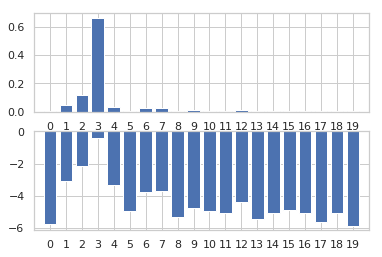

In [18]:
# 특정 데이터가 20개 cat에 속할 확률 각각 계산
plt.subplot(211)
plt.xlim(-1, 20)
plt.bar(model.classes_, model.predict_proba(x)[0])
plt.xticks(model.classes_)

plt.subplot(212)
plt.xlim(-1, 20)
plt.bar(model.classes_, model.predict_log_proba(x)[0])
plt.xticks(model.classes_)

plt.show()

## 1.2 확률론적 판별 모형probabilitic discriminative model
- target $p(y \mid x)$ 를 함수로 표현
- $f(x) = p(y=k \mid x)$
- likelihood $P(x \mid y)$ 필요없음

### 1.2.1 로지스틱 회귀 모형

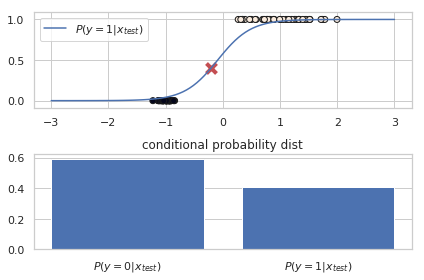

In [62]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# 분류 데이터 생성 및 모델
X0, y = make_classification(n_features=1, n_redundant=0, 
                            n_informative=1, n_clusters_per_class=1)
model = LogisticRegression().fit(X0, y)

# line 그래프 용도
xx = np.linspace(-3, 3, 100)
XX = xx[:, np.newaxis]
prob = model.predict_proba(XX)[:, 1]

# test data
x_test = [[-0.2]]

# class 및 test분포
plt.subplot(211)
plt.plot(xx, prob)
plt.scatter(X0, y, marker='o', c=y, edgecolors='k')
plt.scatter(x_test[0], model.predict_proba(x_test)[0][1:], 
            marker='x', s=100, c='r', linewidth=4)
plt.legend(["$P(y=1|x_{test})$"])

# 조건부 확률분포
plt.subplot(212)
plt.bar(model.classes_, model.predict_proba(x_test)[0])
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.title("conditional probability dist")

plt.tight_layout()
plt.show()

## 2. 판별함수 discriminant function기반 모형
- 판별 경계선 : $f(x) = 0$
- class1 : $f(x) > 0$
- class0 : $f(x) < 0$

## 2.1 Perceptron
- 가장 단순
- 직선 경계선

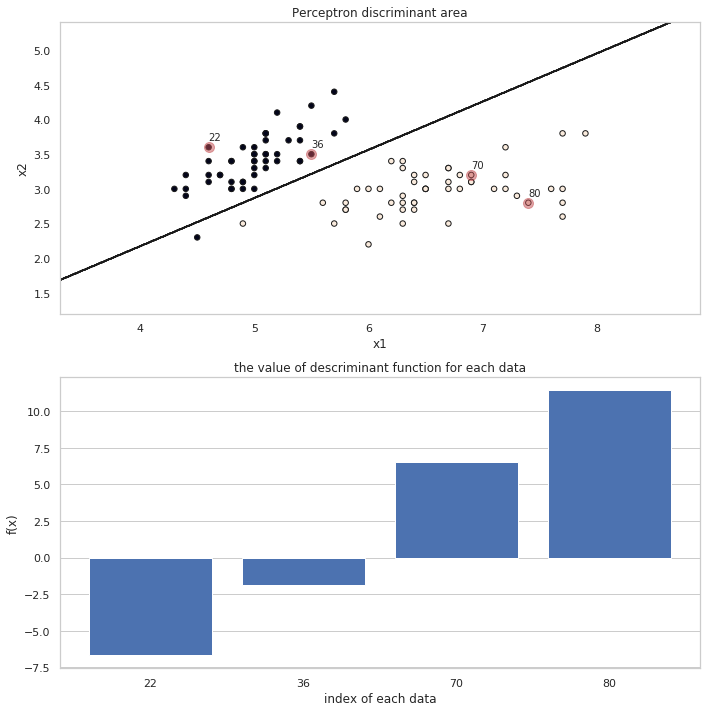

In [150]:
# 2 특징 데이터의 판별경계: line

from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
iris = load_iris()

# iris class 0,1,2 중 0, 2만 True
idx = np.in1d(iris.target, [0, 2])
# X: iris.data True 중 feature 0, 1만 출력
X = iris.data[idx, 0:2]
y = iris.target[idx]

# 모델
model = Perceptron(max_iter=100, eta0=0.1, random_state=1).fit(X, y )

# 격자만들기
XX_min, XX_max = X[:, 0].min() -1, X[:, 0].max() +1
YY_min, YY_max = X[:, 1].min() -1, X[:, 1].max() +1
XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                    np.linspace(YY_min, YY_max, 1000))

ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

## 판별영역
plt.figure(figsize=(10,10))
plt.subplot(211)
# boundary
plt.contour(XX, YY, ZZ, colors='k')
# class 0, 1을 feature x1, x2에 따라 scatter
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k')

idx = [22, 36, 70, 80]
plt.scatter(X[idx, 0], X[idx, 1], c='r', s=100, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1]+0.1))

plt.grid(False)
plt.title("Perceptron discriminant area")
plt.xlabel("x1")
plt.ylabel("x2")


## 각 데이터별 판별함수 값
plt.subplot(212)
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.gca().xaxis.grid(False)
plt.title('the value of descriminant function for each data')
plt.xlabel("index of each data")
plt.ylabel("f(x)")

plt.tight_layout()
plt.show()

## 2.2 커널 SVM(Kernel Support Vector Machine)
- 복잡한 경계선 설정

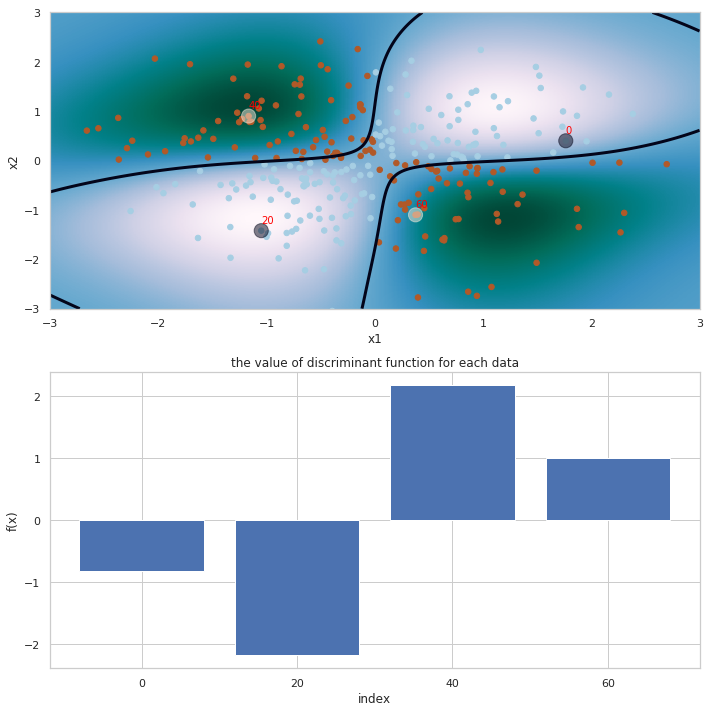

In [180]:
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

model = svm.NuSVC().fit(X, Y)
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

## 경계선
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
                 origin='lower', cmap=plt.cm.PuBuGn)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=3)
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired)

idx = [0, 20, 40, 60]
plt.scatter(X[idx, 0], X[idx, 1], c=Y[idx], s=200, alpha=0.5)

for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1]+0.15), color='red')
plt.grid(False)
plt.axis([-3, 3, -3, 3])
plt.xlabel("x1")
plt.ylabel("x2")

## 각 데이터의 판별함수 값
plt.subplot(212)
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.xlabel("index")
plt.ylabel("f(x)")
plt.title("the value of discriminant function for each data")
plt.tight_layout()
plt.show()